# Lead Scoring Case Study

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings module
import warnings
warnings.filterwarnings("ignore")

# Import libraries for modeling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix

# Problem Statement
<b><font color = maroon>Problem Statement</font></b><br>

<p align="justify">X Education is an education company that offers online courses for industry professionals. The company attracts many visitors to its website through various marketing channels. The company faces a problem: its lead conversion rate is very low. Out of 100 leads, only 30 become customers on average.</p>

<p align="justify">To solve this problem, X Education wants to identify the most potential leads, also known as ‘Hot Leads’. The company has hired you to help them with this task. Your job is to build a model that can assign a lead score to each lead based on various factors, such as their demographics, behavior, preferences, etc. The higher the lead score, the more likely the lead is to convert. The lower the lead score, the less likely the lead is to convert. The company’s CEO has set a target of achieving an 80% lead conversion rate with this model.</p>

<b><font color = maroon>Goals and Objective</font></b><br>
- <p align="justify">Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.</p>
- <p align="justify">There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</p>

<b><font color = maroon>Process</font></b><br>


1.   Data understanding
2.   EDA  
3.   Data preprocessing for modeling
4.   Build models using Logistic Regression.
5.   Model evaluation
6.   Conclusion



# **Step 1:** Data Understanding

In [2]:
# Load the data
df = pd.read_csv('Leads.csv')

In [3]:
# Check the data size
df.shape

(9240, 37)

In [4]:
# Inspecting the dataframe
pd.options.display.max_columns = None
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Inspecting the distribution of numerical data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### The binary distribution represents the converted/non-converted status.  

**Website Engagement:**  
- The average total visits per lead is 3.45, indicating that a typical user visits the site three times.  
- The average time spent is 487 seconds (~8 minutes), which is relatively high, reflecting strong interest in the content, though there is considerable variation.  
- On average, users view 2.36 pages per visit, with a maximum of 55 pages.  
- Activity and Profile Scores fall within a relatively narrow range, suggesting consistency in scoring.

In [6]:
# Inspect the various aspects of the data dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Handling duplicates and error data

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Dropping system data that not relevant for modeling
df.drop('Prospect ID', axis=1, inplace=True)

It appears that 'Select' is the default value stored in the backend for optional columns when a prospective lead opts not to choose any available options from the dropdown menu.

In [9]:
# To convert 'Select' values to NaN
df = df.replace('Select', np.nan)

## Handling missing data

In [10]:
# Check null data
null_df = df.isna().sum()/len(df)*100

# Columns with null data more than 20%
null_df[null_df > 20].sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
dtype: float64

**We'll drop columns with more than 70% of missing values as it does not make sense to impute these many values**

In [11]:
df.drop(null_df[null_df > 70].index, axis=1, inplace=True)

For the remaining columns, we need to analyze them individually.
- For categorical variables, we will examine count and percentage plots.  
- For numerical variables, we will summarize their statistics and analyze box plots.

In [12]:
def percent_plot(var, df):
    values = df[var].value_counts(normalize=True) * 100
    ax = sns.barplot(x=values.index, y=values.values, palette='deep')

    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('% in dataset', fontsize=12)
    ax.set_title(f'Percentage Distribution of {var}', fontsize=14)

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.show()

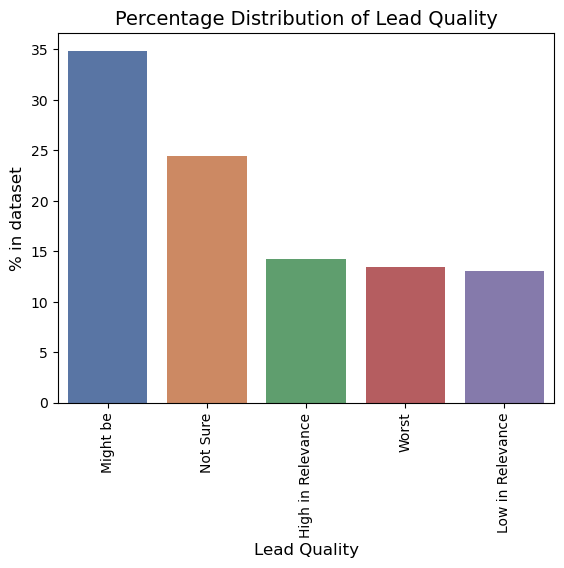

In [13]:
# Plotting the percent distribution for lead quality
percent_plot('Lead Quality', df)

- Represents the lead's quality based on available data and the intuition of the assigned employee.  
- Despite a high percentage of missing values, this metric remains valuable. Missing values should be replaced with "Unknown" to avoid data misinterpretation.

In [14]:
# Replacing missing values of Lead Quality with 'Unknown'
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Unknown')

# Checking the values of Lead Quality after replacing
df['Lead Quality'].value_counts()

Lead Quality
Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

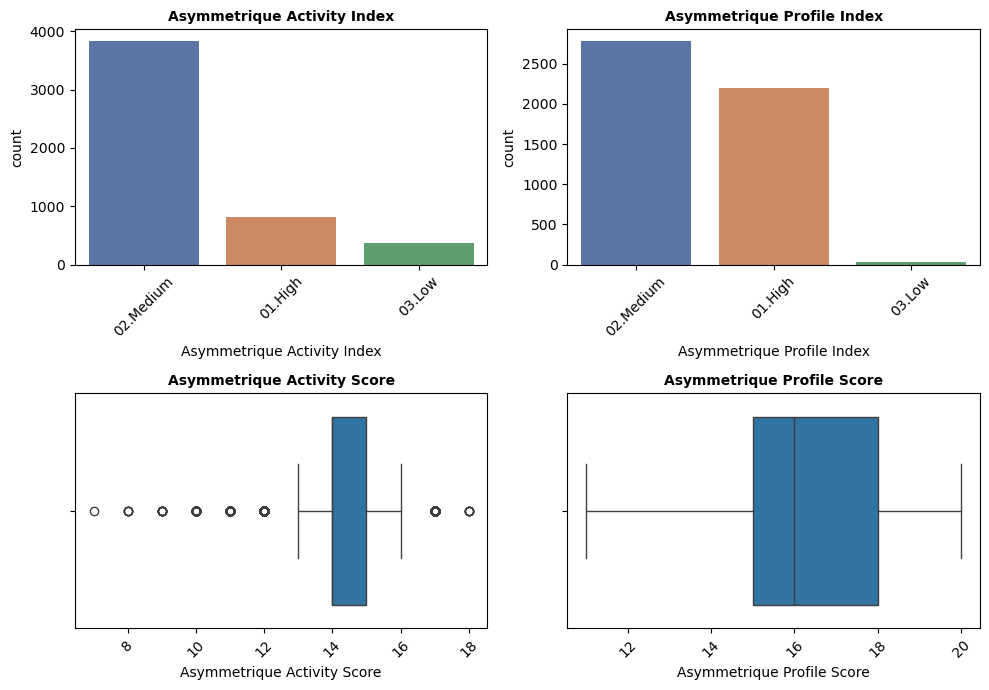

In [15]:
# List of asymmetric variables
asym_list = [
    'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
    'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
]

# Set figure size
plt.figure(figsize=(10, 7))

# Loop through the variables and plot
for i, var in enumerate(asym_list, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=var, palette='deep') if 'Index' in var else sns.boxplot(data=df, x=var)
    plt.title(var, fontsize=10, fontweight='bold')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

- All of these are indices and scores assigned to customers based on their activity and profile.  
- Since these four variables have over 45% missing values and exhibit significant variation in the plots, we should retain only one to avoid multicollinearity.  
- We will keep the Asymmetrique Activity Index and remove the other three, as imputing 45% of numerical scores is not ideal. However, for categorical data, missing values can be replaced with "Unknown" to differentiate between actual and missing data. The indexing system also clearly categorizes customers into High, Medium, and Low groups.

In [16]:
df.drop(['Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], inplace=True, axis=1)

In [17]:
# Fill na value of Asymmetrique Activity Index with "Unknown"
df['Asymmetrique Activity Index'].fillna('Unknown', inplace=True)

In [18]:
df['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
Unknown      4218
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

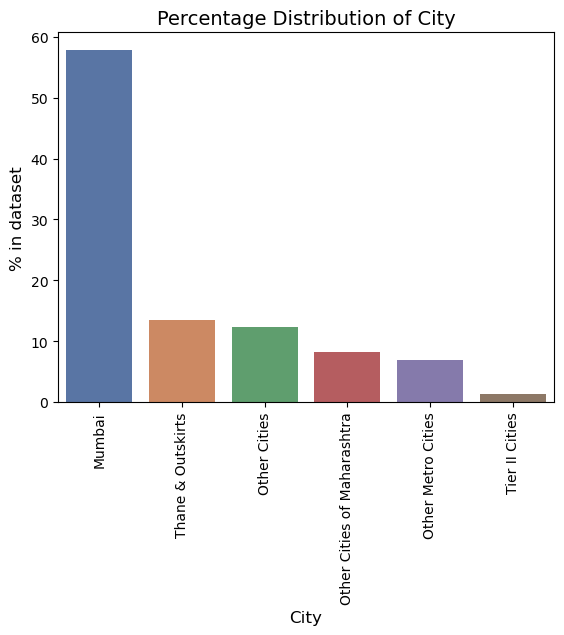

In [19]:
# Plotting the percent distribution
percent_plot('City', df)

**City with 40% missing. Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.**

In [20]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')
df['City'].isnull().sum()

0

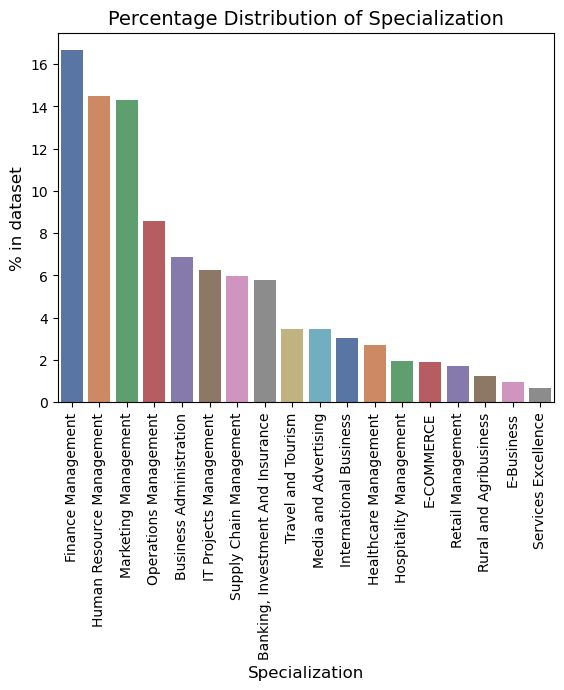

In [21]:
# Plotting the percent distribution
percent_plot('Specialization', df)

- Due to the wide range of specializations, imputing missing values with the mean would be inaccurate. It's possible that an individual either lacks a specialization or has one that isn't listed among the available options.  
- To address this, we will assign missing values to a new category called "Others."

In [22]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')
df['Specialization'].isnull().sum()

0

In [23]:
# Tags assigned to customers indicating the current status of the lead
# The values of variable is rather indicating certain intention to the course taking, similar to Lead Quality
# Checking values of both Tags and Lead Quality
df[['Tags','Lead Quality']].value_counts()

Tags                                               Lead Quality     
Will revert after reading the email                Might be             1117
Ringing                                            Unknown               579
                                                   Not Sure              432
Will revert after reading the email                Low in Relevance      413
                                                   High in Relevance     390
                                                                        ... 
Recognition issue (DEC approval)                   Low in Relevance        1
number not provided                                Low in Relevance        1
In confusion whether part time or DLP              Unknown                 1
                                                   Worst                   1
Want to take admission but has financial problems  Unknown                 1
Name: count, Length: 110, dtype: int64

- This metric offers more detailed information and, consequently, greater predictive power than Lead Quality.  
- Although it has 36% missing values, which is significant, it is still lower than the 51% missing in Lead Quality.  
- It may provide additional actionable insights alongside Lead Quality. To maintain data integrity, missing values will be imputed with "Unknown."

In [24]:
# Define tag categories based on similarities and frequencies
tag_mapping = {
    # Active and potential leads
    'Will revert after reading the email': 'Active_Lead',
    'Ringing': 'Active_Lead',
    'Interested in other courses': 'Active_Lead',
    'Interested in full time MBA': 'Active_Lead',
    'Interested in Next batch': 'Active_Lead',
    'Shall take in the next coming month': 'Active_Lead',

    # Contact issues (low lead scoring)
    'invalid number': 'Contact_Issue',
    'wrong number given': 'Contact_Issue',
    'number not provided': 'Contact_Issue',
    'opp hangup': 'Contact_Issue',

    # Lost/Closed leads
    'Lost to EINS': 'Lost_Closed',
    'Lost to Others': 'Lost_Closed',
    'Closed by Horizzon': 'Lost_Closed',
    'switched off': 'Lost_Closed',
    'Busy': 'Lost_Closed',

    # Current Students
    'Already a student': 'Current_Student',
    'Graduation in progress': 'Current_Student',
    'Lateral student': 'Current_Student',

    # Not Interested
    'Not doing further education': 'Not_Interested',

    # Others (not eligible, financial constraints, still considering)
    'Diploma holder (Not Eligible)': 'Others',
    'University not recognized': 'Others',
    'Recognition issue (DEC approval)': 'Others',
    'Still Thinking': 'Others',
    'In confusion whether part time or DLP': 'Others',
    'Want to take admission but has financial problems': 'Others',

    # Unknown category
    np.nan: 'Unknown',
    'Unknown': 'Unknown'
}

# Apply mapping to the 'Tags' column
df['Tags'] = df['Tags'].map(tag_mapping).fillna('Unknown')

# Display value distribution after grouping
df['Tags'].value_counts()

Tags
Active_Lead        3795
Unknown            3482
Lost_Closed         966
Current_Student     579
Contact_Issue       190
Not_Interested      145
Others               83
Name: count, dtype: int64

In [25]:
df['Tags'].isnull().sum()

0

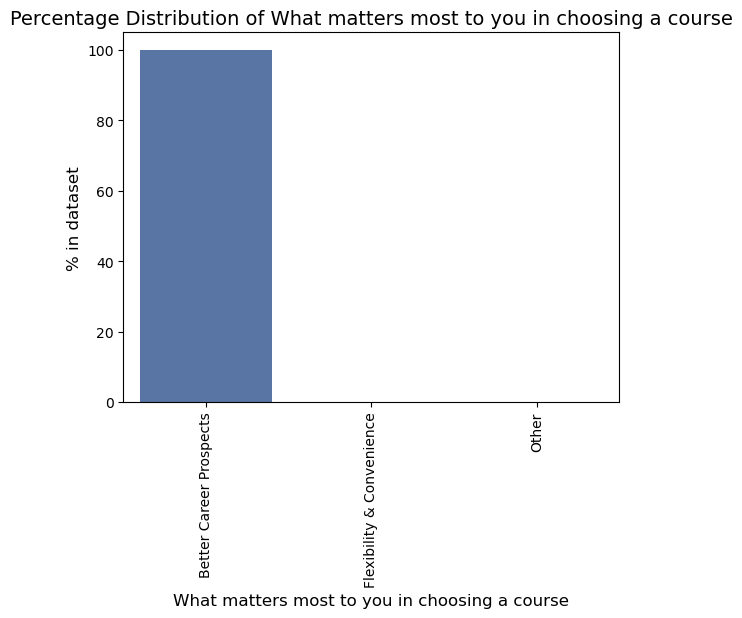

In [26]:
# An option selected by the customer indicating what is their main motto behind doing this course
percent_plot('What matters most to you in choosing a course', df)

- The data is highly imbalanced, with nearly all respondents selecting the course for better career prospects. This could be due to biased answer choices or an overwhelming preference for one option.  
- Since there is minimal variance, it does not provide valuable insights for lead scoring, making it suitable for removal.

In [27]:
df.drop('What matters most to you in choosing a course', inplace=True, axis=1)

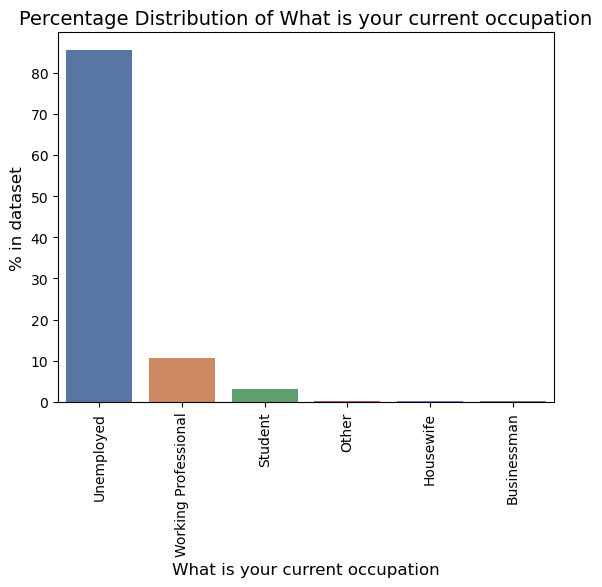

In [28]:
# Plotting the percent distribution
percent_plot('What is your current occupation', df)

- Occupation status can serve as a key indicator for pursuing further education, as it helps predict both motivation for enrolling in the course and financial capability.  
- The data reveals three primary segments: unemployed individuals, working professionals, and others, highlighting potential drivers such as career change, improvement, or upskilling for lead scoring.  
- To enhance clarity, we will reorganize the categories and impute missing values with "Unknown."

In [29]:
# We will regroup the categories, imputing "Unknown" for missing values
occupation_mapping = {
        'Unemployed': 'Unemployed',
        'Working Professional': 'Working',
        'Student': 'Student',
        'Other': 'Other',
        'Housewife': 'Other',
        'Businessman': 'Working',
        np.nan: 'Unknown'
    }

df['What is your current occupation'] = df['What is your current occupation'].map(occupation_mapping)
# Checking the values after grouping
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed    5600
Unknown       2690
Working        714
Student        210
Other           26
Name: count, dtype: int64

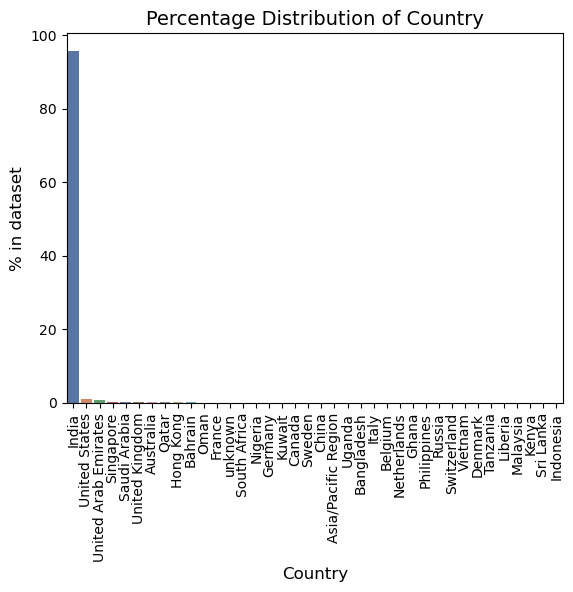

In [30]:
# Plotting the percent distribution
percent_plot('Country', df)

- With 26% missing values and the majority of data concentrated in India, the country variable offers limited insight into a candidate's potential.  
- As it does not contribute significantly to lead assessment, we will remove this data.

In [31]:
df.drop('Country', axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9204 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9103 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9103 non-null   float64
 9   Last Activity                             9137 non-null   object 
 10  Specialization                      

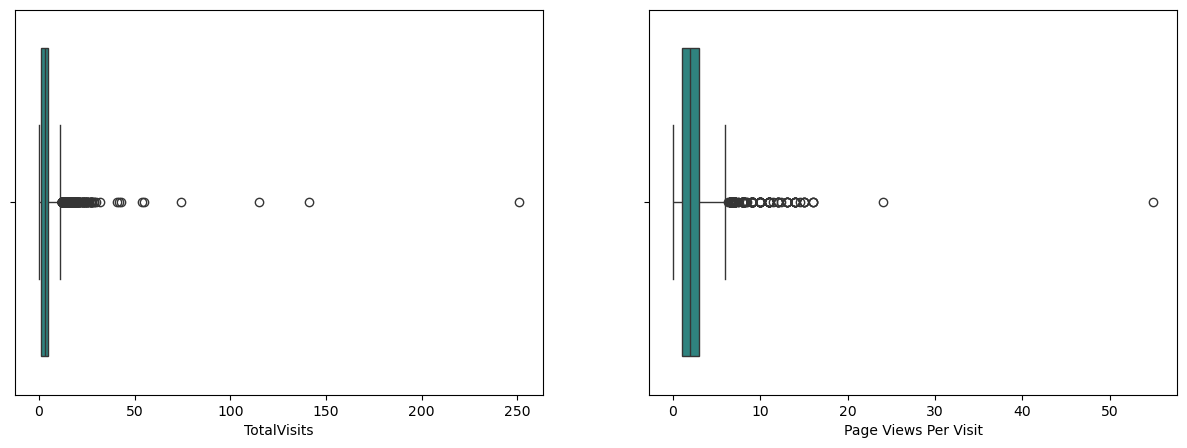

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [33]:
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(data=df, x=var, palette='viridis')
plt.show()

df[visit_list].describe()

**Based on the analysis, both variables exhibit significant variation. Since the missing values account for less than 2%, it is preferable to remove the rows containing them.**

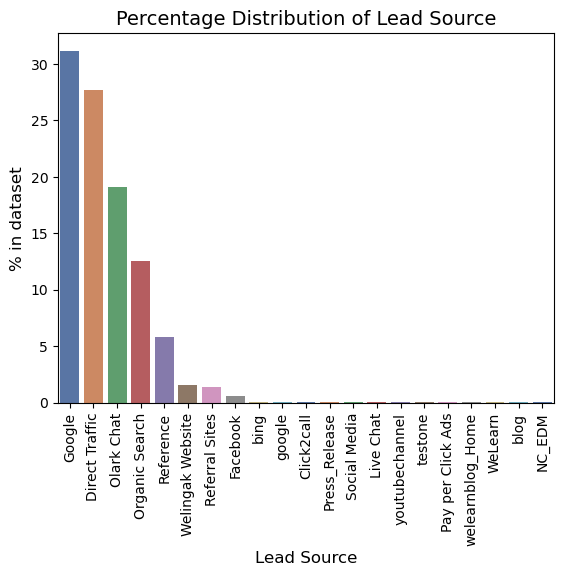

In [34]:
percent_plot('Lead Source', df)

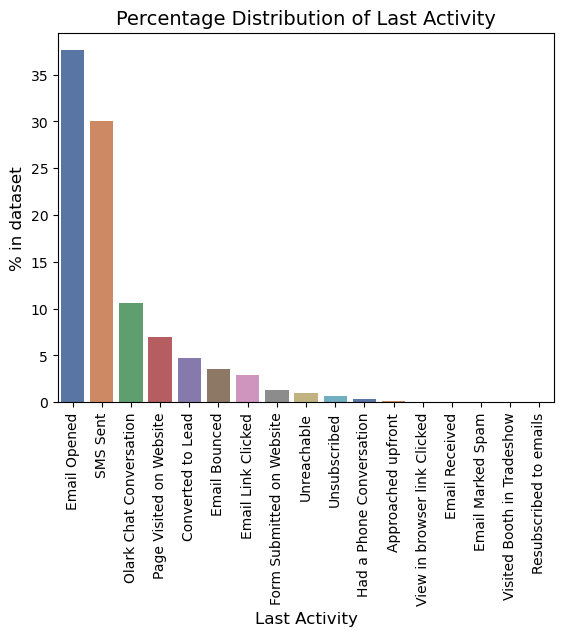

In [35]:
percent_plot('Last Activity', df)

**For these categorical variables, imputing with the most frequent value is not ideal, as the next most frequent value has a similar occurrence. Additionally, since the percentage of missing values is minimal, it is best to remove the rows containing them. Therefore, we will drop rows with missing values for all four variables.**

In [36]:
# To drop the rows containing missing values
df.dropna(inplace = True)

In [37]:
# Checking all null data
df.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Lead Quality                      

## Outlier Treatment for numerical data

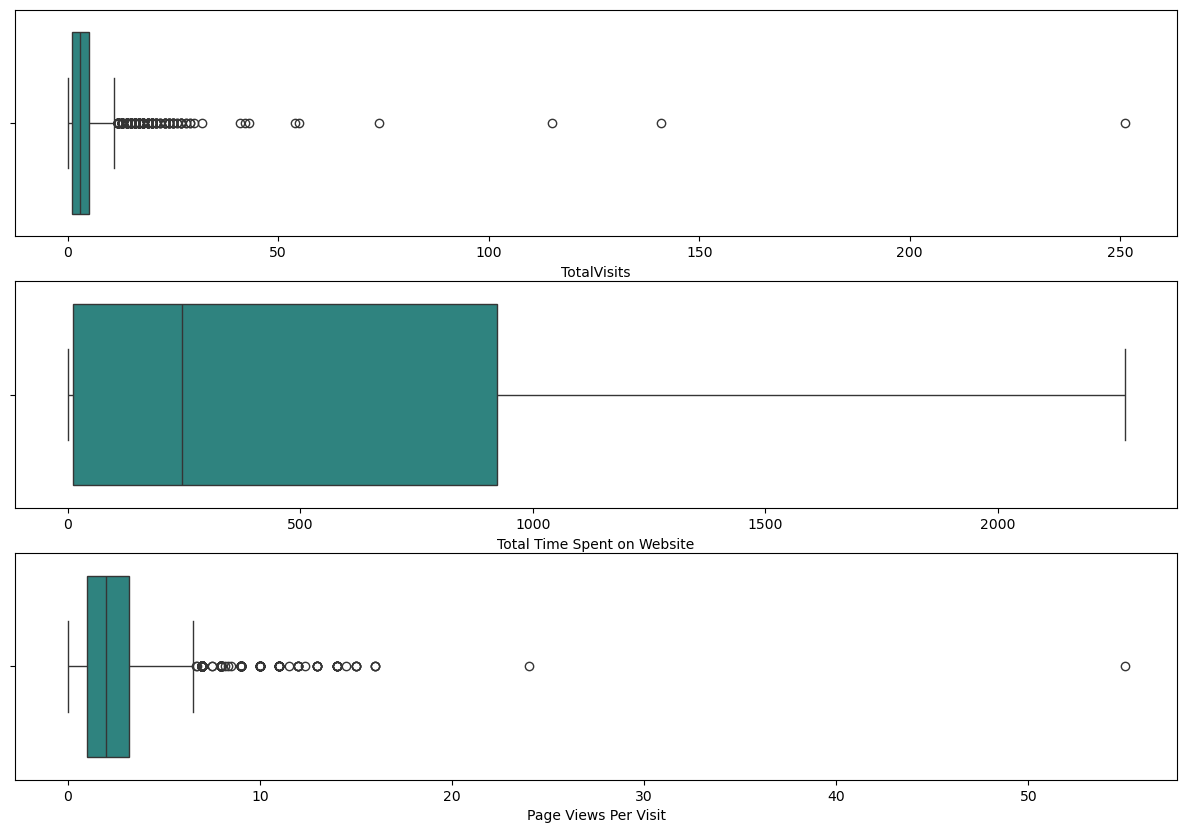

In [38]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=df, x=var, palette='viridis')
plt.show()

In [39]:
df[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


The boxplots indicate the presence of outliers in these variables.  

- For **'TotalVisits'**, the 95th percentile is 10, while the maximum reaches 251. To manage this, outliers should be capped at the 95th percentile.  
- **'Total Time Spent on Website'** does not show any significant outliers.  
- For **'Page Views Per Visit'**, similar to **'TotalVisits'**, outliers should also be capped at the 95th percentile.

In [40]:
# Outlier treatment
percentile = df['TotalVisits'].quantile([0.95]).values
df['TotalVisits'][df['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df['Page Views Per Visit'].quantile([0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentile[0]] = percentile[0]

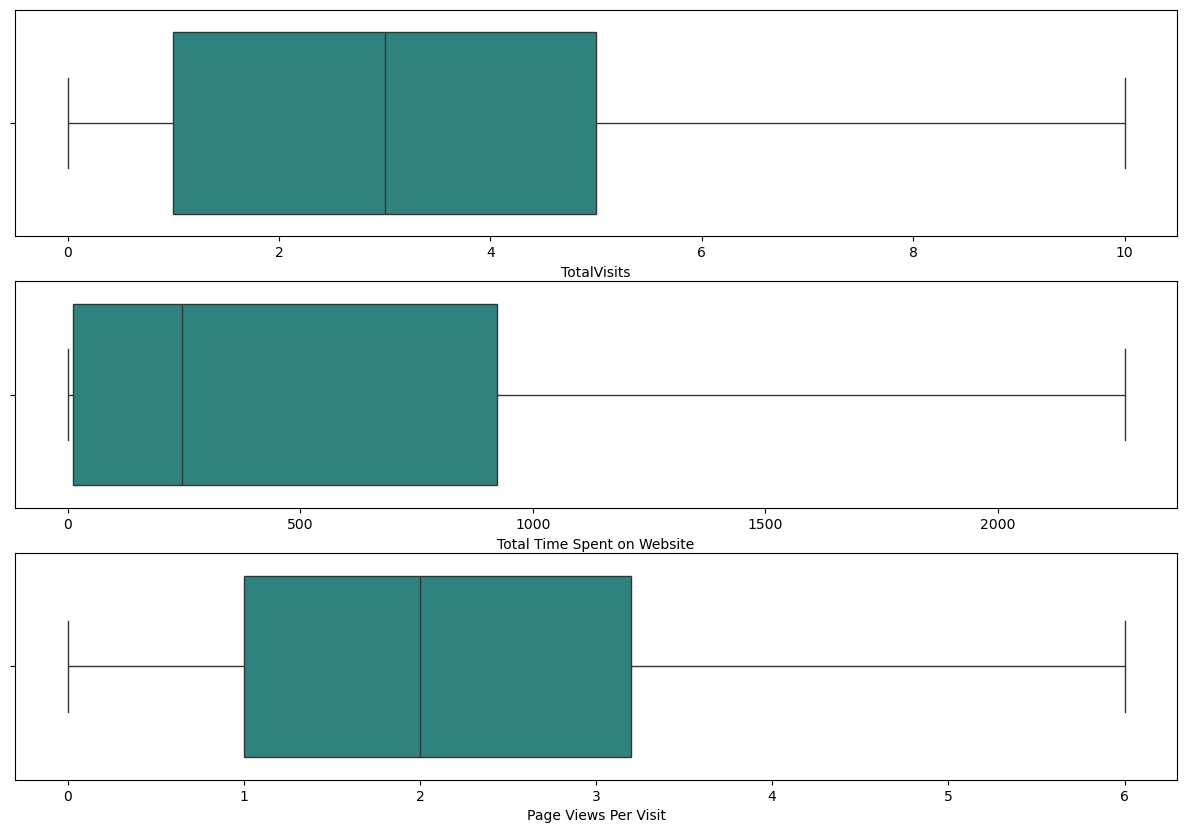

In [41]:
# Plot Boxplots to verify the treatment
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=df, x=var, palette='viridis')
plt.show()

# **Step 2:** EDA

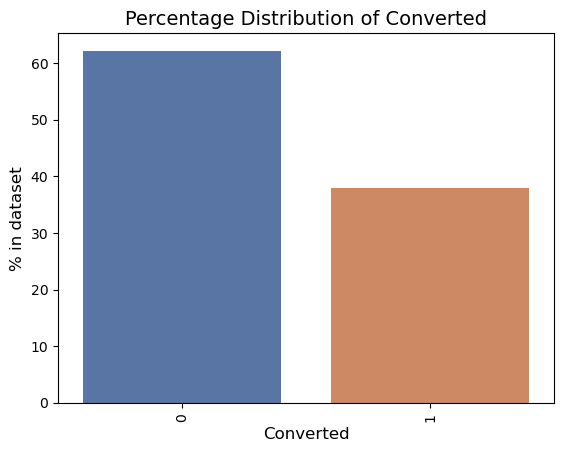

In [42]:
# For the target variable 'Converted'
percent_plot('Converted', df)

- In the **'Converted'** data, 37.9% of the values are **1**, meaning 37.9% of the leads have converted. This indicates a moderately imbalanced dataset.  
- Logistic Regression is well-suited to handle this level of imbalance.

## To plot numerical variables against target variable to analyse relations

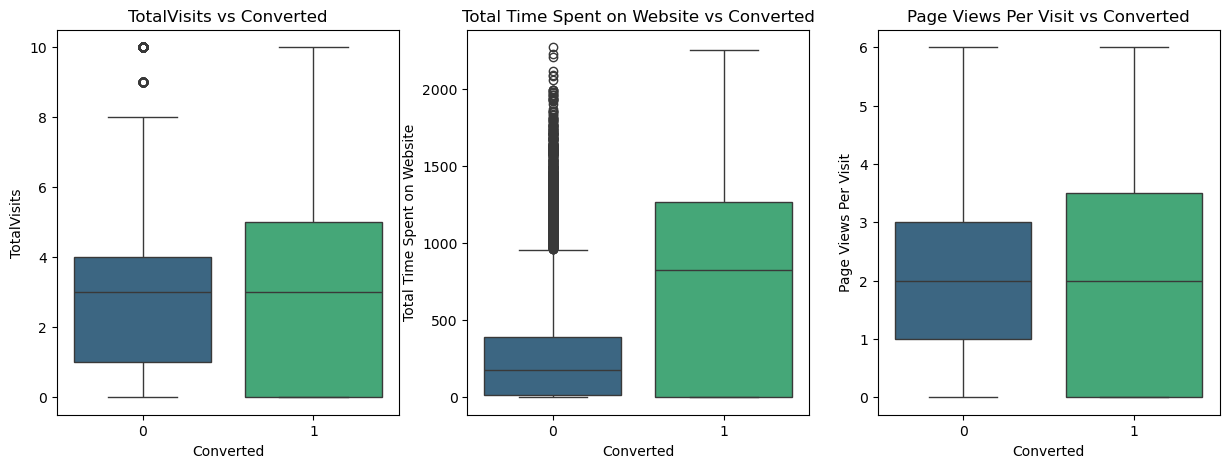

In [43]:
# To plot the distribution of the numerical data
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = df, palette='viridis')
    plt.title(f'{var} vs Converted')
plt.show()

- 'TotalVisits' has the same median value for both groups, but converted users exhibit greater variability.
- Converted leads spend significantly more time on the website, with a higher median compared to non-converted users. Additionally, the converted group shows a wider distribution and fewer outliers, suggesting that an optimal range of time spent contributes to conversion, with some variance in user behavior.
- 'Page Views Per Visit' also shares the same median value across both groups.
- Time spent on the website appears to be a strong predictor of conversion.

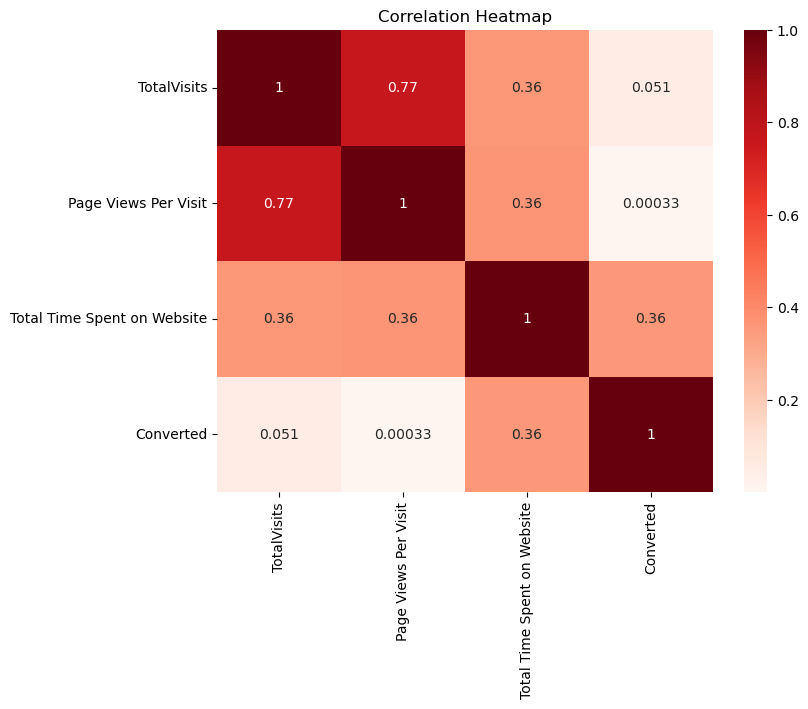

In [44]:
# Correlation between target variable with numerical data
numeric_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website', 'Converted']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

- There is a strong correlation between **'Total Visits'** and **'Page Views Per Visit'**, indicating that users who visit more frequently also tend to browse more pages per visit.  
- Additionally, **'Total Time Spent on Site'** shows a moderate correlation with **'Converted'**, making it a valuable predictor for conversion.

## To plot categorial variables against target variable to analyse relations

In [45]:
def visualize_conversion_rate(category, size=(15, 6), angle=45):
    # Create a figure with dual y-axes
    fig, primary_ax = plt.subplots(figsize=size)
    secondary_ax = primary_ax.twinx()

    # Determine category order based on frequency
    category_order = df[category].value_counts().index

    # Plot category counts with hue for conversion status
    sns.countplot(data=df, x=category, hue='Converted', ax=primary_ax, order=category_order)
    primary_ax.set_xticklabels(primary_ax.get_xticklabels(), rotation=angle, ha='right')
    primary_ax.set_ylabel('Frequency')

    # Compute conversion rate
    grouped_data = df.groupby(category)['Converted'].agg(['sum', 'count'])
    conversion_rate = (grouped_data['sum'] / grouped_data['count'] * 100).reindex(category_order)

    # Plot conversion rate trend
    secondary_ax.plot(range(len(conversion_rate)), conversion_rate,
                      color='darkred', marker='o', linestyle='-', linewidth=2, markersize=8)
    secondary_ax.set_ylabel('Conversion Rate (%)', color='black')
    secondary_ax.tick_params(axis='y', labelcolor='black')

    # Add conversion rate labels to points
    for index, rate in enumerate(conversion_rate):
        secondary_ax.text(index, rate, f'{rate:.1f}%', ha='center', va='bottom', color='darkred')

    # Adjust legend
    legend_handles, legend_labels = primary_ax.get_legend_handles_labels()
    primary_ax.legend(legend_handles, ['Not Converted', 'Converted'],
                      loc='upper right', bbox_to_anchor=(1.15, 1))

    # Title and layout adjustments
    plt.title(f'Conversion Rate Analysis for {category}', pad=20)
    plt.tight_layout()

    return fig, primary_ax, secondary_ax

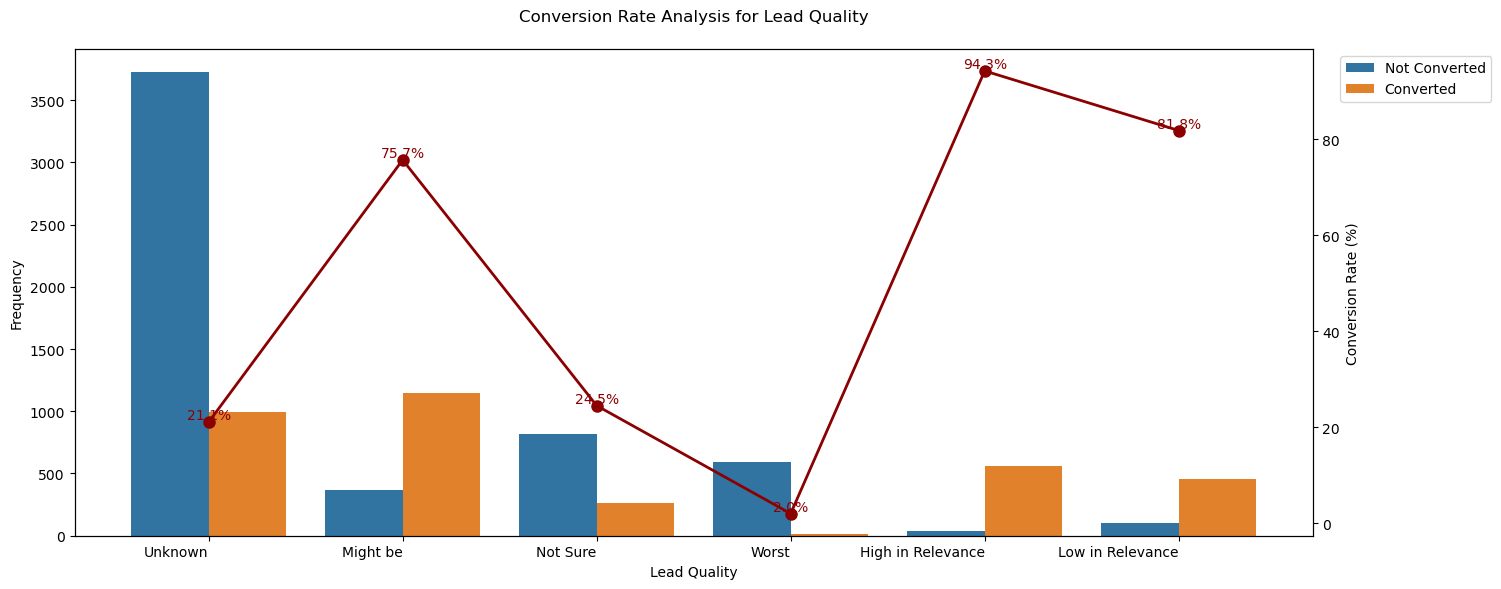

In [46]:
# Lead Quality
visualize_conversion_rate('Lead Quality',angle=0)
plt.show()

- Leads categorized as **"High in Relevance"** and **"Low in Relevance"** have the highest conversion rates (~94%), but their overall volume is relatively low.  
- The **"Unknown"** category has a high volume but a low conversion rate, indicating that this group should be a key focus for lead targeting.  
- The **"Might be"** category demonstrates strong performance with a well-balanced mix of volume and conversion rate.

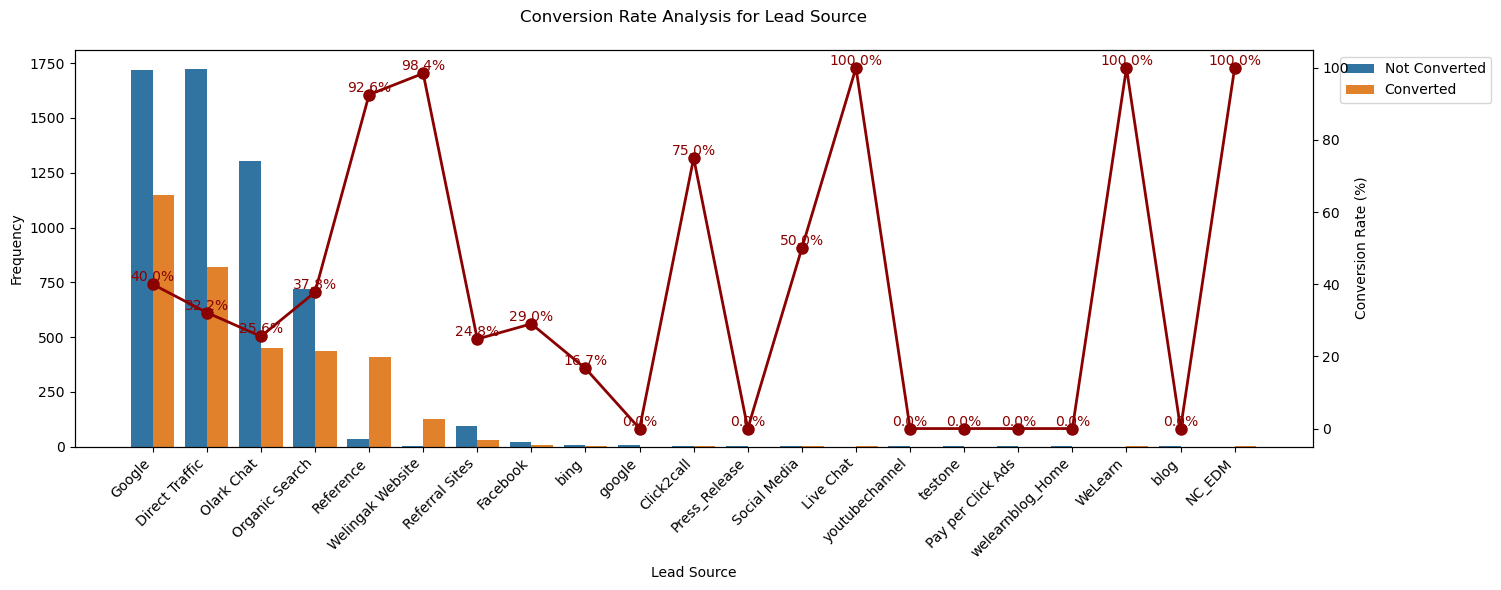

In [47]:
# Lead Source Distribution
visualize_conversion_rate('Lead Source')
plt.show()

### **Data is scattering into many uncessary categories. We will group relevant data together to create more meaningful analysis**

In [48]:
# Mapping the categories of Lead Source
source_mapping = {
    'Olark Chat': 'Chat',
    'Live Chat': 'Chat',
    'Organic Search': 'Search',
    'Google': 'Search',
    'google': 'Search',
    'bing': 'Search',
    'Direct Traffic': 'Direct',
    'Referral Sites': 'Referral',
    'Reference': 'Referral',
    'Welingak Website': 'Partner Sites',
    'WeLearn': 'Partner Sites',
    'welearnblog_Home': 'Blog',
    'blog': 'Blog',
    'Facebook': 'Facebook',
    'Social Media': 'Social Media',
    'youtubechannel': 'Youtube',
    'Pay per Click Ads': 'Paid Ads',
    'Click2call': 'Phone',
    'testone': 'Other',
    'Press_Release': 'PR',
    'NC_EDM': 'Email'
}

df['Lead Source'] = df['Lead Source'].map(source_mapping)

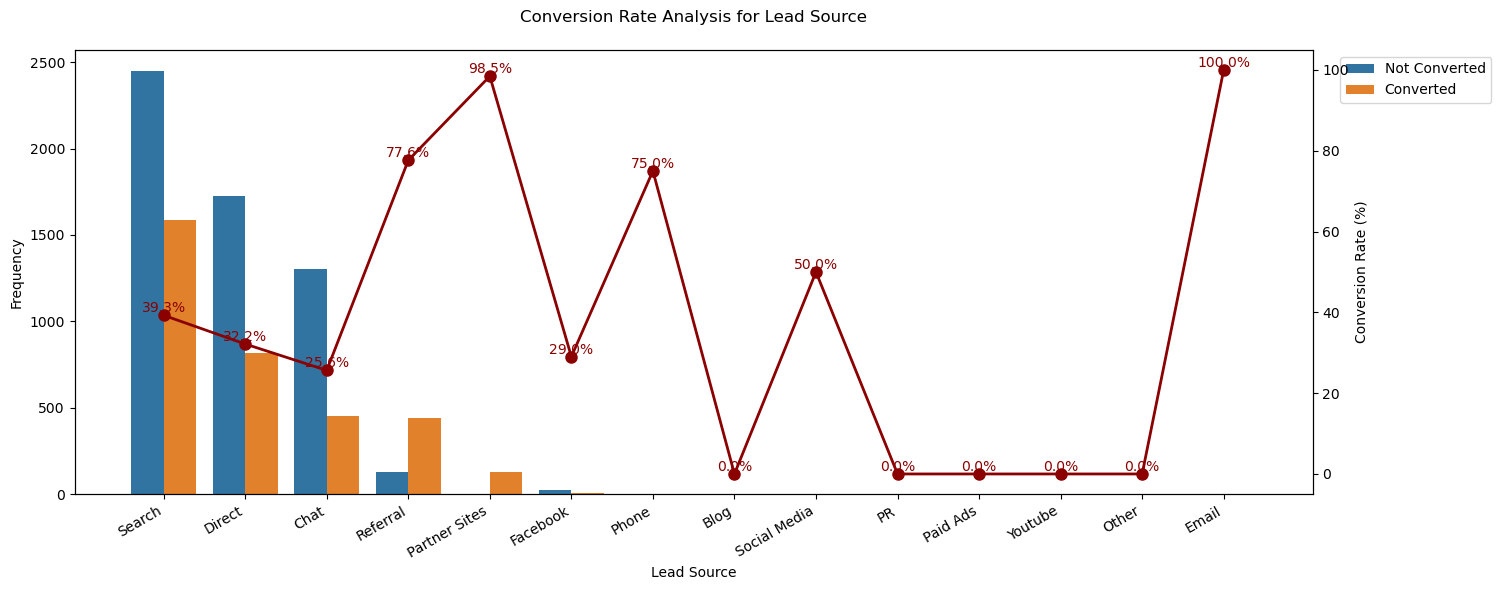

In [49]:
# Replotting the Lead Source Distribution
visualize_conversion_rate('Lead Source',angle=30)
plt.show()

- Sources with **high traffic volume**, such as **search, direct, and chat**, generate the most visits but have low conversion rates.  
- Referral marketing through **partner sites and referral programs** performs well, likely due to the higher trust associated with these sources.  
- Most **digital marketing channels** show poor results, except for **Social Media and Facebook**, which perform comparatively better.

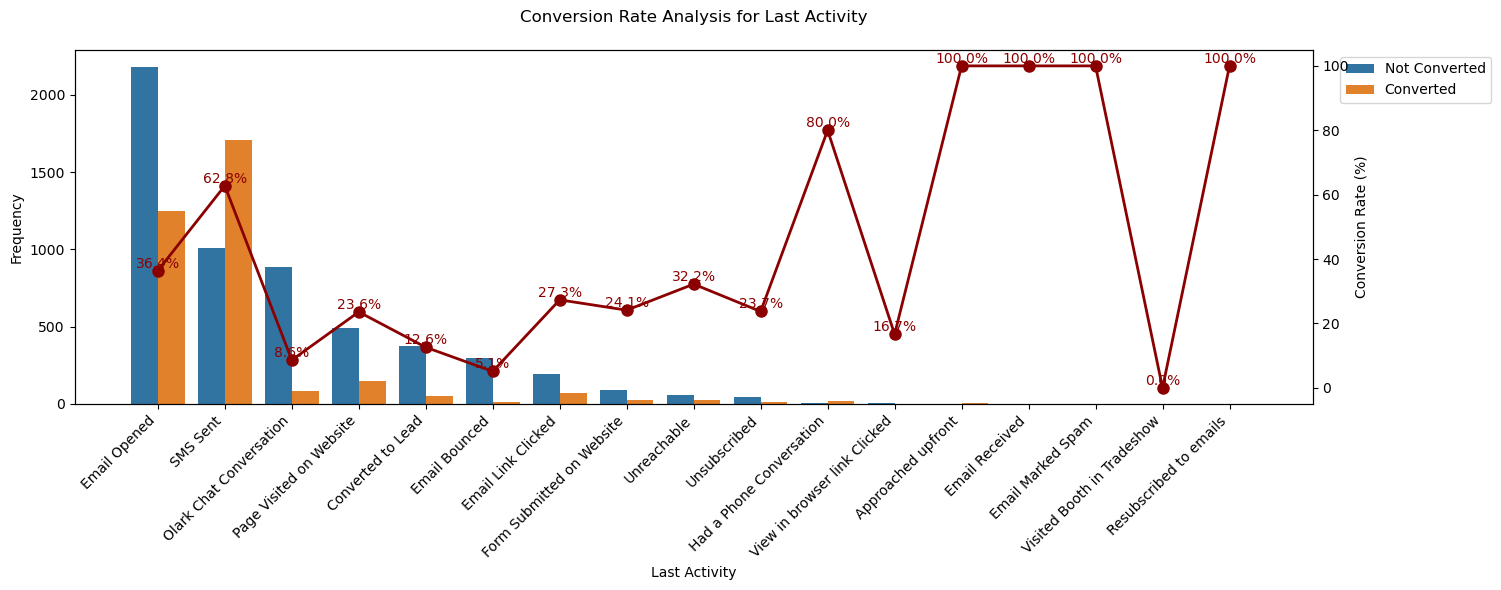

In [50]:
# Last Activity Distribution
visualize_conversion_rate('Last Activity')
plt.show()

- The highest number of leads are generated when the last activity is **'Email Opened'**, **'SMS Sent'**, or **'Chat Conversation'**, with **SMS** showing the best conversion rate among them.  
- Other activities have volumes too low to assess conversion rates accurately.  
- **'Page Visited on Website'** serves as a strong early-stage interaction indicator, with **23% of leads converting**.

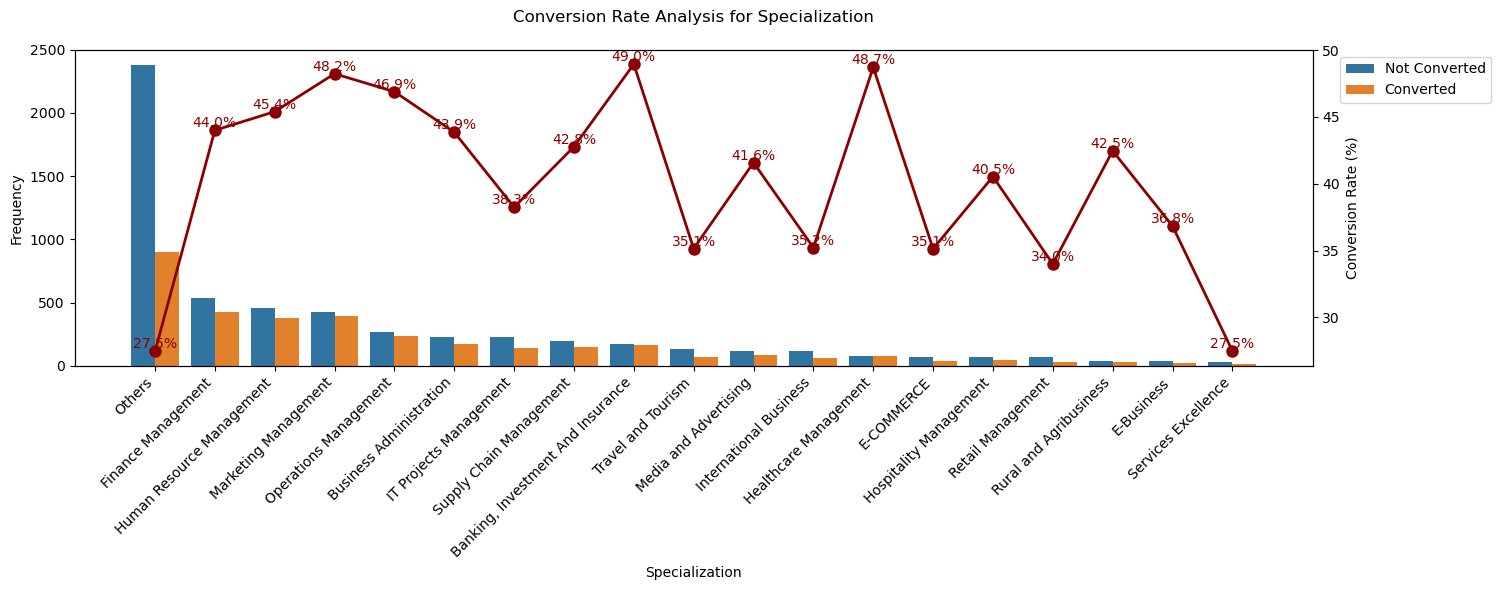

In [51]:
# Specialization Distribution
visualize_conversion_rate('Specialization')
plt.show()

- The **"Others"** category has the highest lead volume but the lowest conversion rate, whereas specialized fields, though having lower volumes, achieve higher conversion rates.  
- This suggests that developing strategies to better classify these leads into specific specializations could enhance overall conversion rates through more effective targeting.

# **Step 3:** Data Preprocessing for Modelling

In [52]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,No,Active_Lead,Low in Relevance,No,No,Mumbai,02.Medium,No,No,Modified
1,660728,API,Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,Active_Lead,Unknown,No,No,Mumbai,02.Medium,No,No,Email Opened
2,660727,Landing Page Submission,Direct,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,Active_Lead,Might be,No,No,Mumbai,02.Medium,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Active_Lead,Not Sure,No,No,Mumbai,02.Medium,No,No,Modified
4,660681,Landing Page Submission,Search,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No,No,Active_Lead,Might be,No,No,Mumbai,02.Medium,No,No,Modified


### Encoding Binary variables

In [53]:
# There are several numerical binary variable is defined as object with Yes/No, we will convert into 1/0 values
binary_cols = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
               'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
               'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque','A free copy of Mastering The Interview']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

### Encoding Categorical variables

In [54]:
# Asymmetrique Activity Index

# Replacing the null values with '4' and High with 1, Medium with 2 and Low with 3
map_list = {'01.High':1,'02.Medium':2,'03.Low':3, 'Unknown':4}
df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].map(map_list)

# Checking the values after mapping
df['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
4    4153
2    3739
1     820
3     362
Name: count, dtype: int64

In [55]:
# get the list of all objects cols for encoding
objectcols = ['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity']
objectcols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [56]:
# Convert to dummy variables
df = pd.get_dummies(df, columns=objectcols, drop_first=True).astype(int)

In [57]:
df.head(2)

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct,Lead Source_Email,Lead Source_Facebook,Lead Source_Other,Lead Source_PR,Lead Source_Paid Ads,Lead Source_Partner Sites,Lead Source_Phone,Lead Source_Referral,Lead Source_Search,Lead Source_Social Media,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working,Tags_Contact_Issue,Tags_Current_Student,Tags_Lost_Closed,Tags_Not_Interested,Tags_Others,Tags_Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5,674,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [58]:
# Split the train and test set
X = df.drop('Converted', axis=1)
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [59]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct,Lead Source_Email,Lead Source_Facebook,Lead Source_Other,Lead Source_PR,Lead Source_Paid Ads,Lead Source_Partner Sites,Lead Source_Phone,Lead Source_Referral,Lead Source_Search,Lead Source_Social Media,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working,Tags_Contact_Issue,Tags_Current_Student,Tags_Lost_Closed,Tags_Not_Interested,Tags_Others,Tags_Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7811,589885,0,0,2,949,2,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6959,596270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
986,649597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5929,604385,0,0,2,178,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3182,629524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [60]:
# Transform the numerical cols using Min Max Scaler
numeric_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct,Lead Source_Email,Lead Source_Facebook,Lead Source_Other,Lead Source_PR,Lead Source_Paid Ads,Lead Source_Partner Sites,Lead Source_Phone,Lead Source_Referral,Lead Source_Search,Lead Source_Social Media,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working,Tags_Contact_Issue,Tags_Current_Student,Tags_Lost_Closed,Tags_Not_Interested,Tags_Others,Tags_Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7811,589885,0,0,0.2,0.417694,0.333333,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6959,596270,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
986,649597,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5929,604385,0,0,0.2,0.078345,0.166667,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3182,629524,0,0,0.0,0.000000,0.000000,0,0,0,0

In [61]:
# Using Lead Number as Indexing for y_train, y_test
y_train.index = X_train['Lead Number']
y_test.index = X_test['Lead Number']

# Dropping Lead Number from the feature data, that not relevant for modeling
X_train.drop('Lead Number', axis=1, inplace=True)
X_test.drop('Lead Number', axis=1, inplace=True)

# Reset indexing
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [62]:
X_train.head(2)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct,Lead Source_Email,Lead Source_Facebook,Lead Source_Other,Lead Source_PR,Lead Source_Paid Ads,Lead Source_Partner Sites,Lead Source_Phone,Lead Source_Referral,Lead Source_Search,Lead Source_Social Media,Lead Source_Youtube,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working,Tags_Contact_Issue,Tags_Current_Student,Tags_Lost_Closed,Tags_Not_Interested,Tags_Others,Tags_Unknown,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.2,0.417694,0.333333,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
y_train.head(2)

Lead Number
589885    0
596270    0
Name: Converted, dtype: int32

# **Step 4:** Building models using Logistic Regression

### **Feature Selection**

In [64]:
# Create RFE with 15 significant features
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# Create a dataframe of features and their ranking (1 means selected)
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
    })

# Print feature ranking
feature_ranking = feature_ranking.sort_values('Ranking')
print(feature_ranking.head(20))

# Get selected features
selected_features = X_train.columns[rfe.support_]

# Create new X_train with selected features only
X_train_rfe = X_train[selected_features]

                                     Feature  Selected  Ranking
0                               Do Not Email      True        1
82                        Lead Quality_Worst      True        1
81                      Lead Quality_Unknown      True        1
80                     Lead Quality_Not Sure      True        1
70   What is your current occupation_Unknown      True        1
28                 Lead Source_Partner Sites      True        1
72                        Tags_Contact_Issue      True        1
71   What is your current occupation_Working      True        1
74                          Tags_Lost_Closed      True        1
75                       Tags_Not_Interested      True        1
3                Total Time Spent on Website      True        1
76                               Tags_Others      True        1
77                              Tags_Unknown      True        1
73                      Tags_Current_Student      True        1
19                 Lead Origin_Lead Add 

## **Building the model with selected features**

In [65]:
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

# Function to build a Logistic regression model
def model(X_train, y_train):
    # Adding constant to X_train
    X_train_sm = add_constant(X_train)
    # Reshape y_train to have a single column
    y_train = y_train.values.reshape(-1, 1)
    # Using logistic regression
    model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
    return model

In [66]:
# Function to check VIF of the model
def vif(df):
  vif = pd.DataFrame()
  vif['Features'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

In [67]:
y_train = pd.DataFrame(y_train)

# Building the first model
model1 = model(X_train_rfe, y_train)
print(model1.summary())
print(vif(X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.9
Date:                Thu, 20 Mar 2025   Deviance:                       5103.8
Time:                        22:11:47   Pearson chi2:                 8.31e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4641
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### **We will drop the Tags_Unknown variable with a high VIF 6.09**

In [68]:
X_train_rfe_2 = X_train_rfe.drop('Tags_Unknown', axis=1)

# Building the second model
model2 = model(X_train_rfe_2, y_train)
print(model2.summary())
print(vif(X_train_rfe_2))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.3
Date:                Thu, 20 Mar 2025   Deviance:                       5326.7
Time:                        22:11:50   Pearson chi2:                 7.56e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4474
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**The model summary statistics indicate strong performance, with all parameters having a **VIF below 5** and statistically significant **p-values**.**

# **Step 5:** Model Evaluation

### **ROC Curve**

In [69]:
y_train.head()

,Converted
Lead Number,
589885,0
596270,0
649597,0
604385,0
629524,1


In [70]:
y_train = pd.DataFrame(y_train, columns=['Converted'])

In [71]:
# Getting the predicted values on the train set
X_train_sm = add_constant(X_train_rfe_2)
y_train_pred = model2.predict(X_train_sm)

# Creating a dataframe of the predicted conversion and actual conversion
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = y_train.copy()
y_train_pred_final['Converted'] = y_train['Converted']
y_train_pred_final['Conversion_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Conversion_Prob > 0.4 (the optimal threshold) else 0
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
Lead Number,,,
589885,0,0.322255,0
596270,0,0.553402,1
649597,0,0.156376,0
604385,0,0.094496,0
629524,1,0.930509,1


In [72]:
def plot_roc_curve(true_labels, predicted_probs):
    # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr_vals, tpr_vals, _ = metrics.roc_curve(true_labels, predicted_probs, drop_intermediate=False)
    auc_value = metrics.roc_auc_score(true_labels, predicted_probs)

    # Create the plot
    plt.figure(figsize=(5, 5))
    plt.plot(fpr_vals, tpr_vals, label=f'ROC Curve (AUC = {auc_value:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line

    # Set plot limits and labels
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve Analysis')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    plt.show()

In [73]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

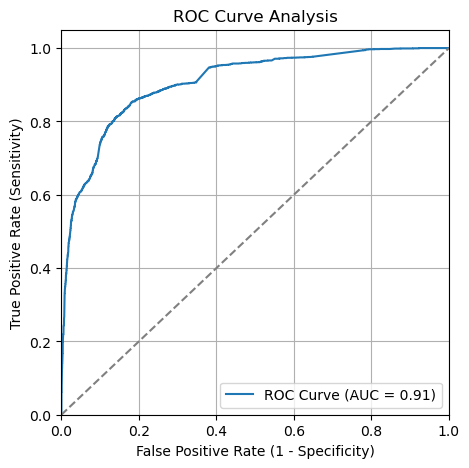

In [74]:
plot_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### **Model Performance:**  

- **AUC = 0.91**, demonstrating excellent discriminative capability.  
- The curve is well above the diagonal, indicating that the model significantly outperforms random classification.

## **Optimal Cut-off**

In [75]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Lead Number,,,,,,,,,,,,,
589885,0,0.322255,0,1,1,1,1,0,0,0,0,0,0
596270,0,0.553402,1,1,1,1,1,1,1,0,0,0,0
649597,0,0.156376,0,1,1,0,0,0,0,0,0,0,0
604385,0,0.094496,0,1,0,0,0,0,0,0,0,0,0
629524,1,0.930509,1,1,1,1,1,1,1,1,1,1,1


In [76]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378702  1.000000  0.000000
0.1   0.1  0.662075  0.965078  0.477384
0.2   0.2  0.789227  0.891233  0.727051
0.3   0.3  0.831519  0.851946  0.819069
0.4   0.4  0.841025  0.800655  0.865632
0.5   0.5  0.841851  0.758458  0.892683
0.6   0.6  0.821187  0.655511  0.922173
0.7   0.7  0.820085  0.588214  0.961419
0.8   0.8  0.806309  0.531466  0.973836
0.9   0.9  0.758920  0.383776  0.987583


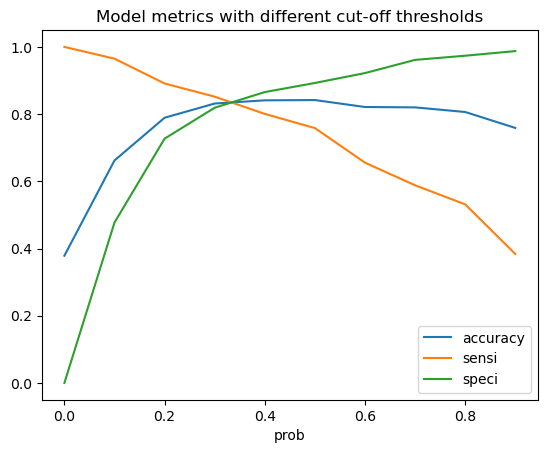

In [77]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Model metrics with different cut-off thresholds')
plt.show()

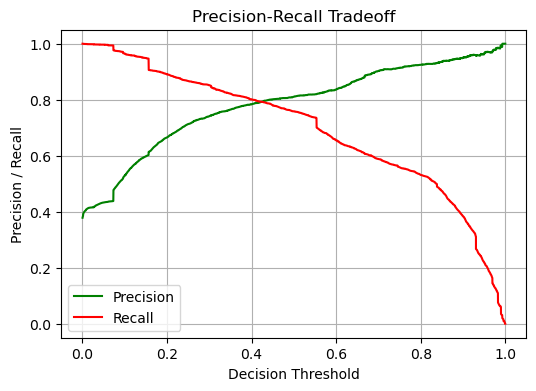

In [78]:
# Compute precision, recall, and thresholds
precision_vals, recall_vals, thresh_vals = precision_recall_curve(
    y_train_pred_final["Converted"], y_train_pred_final["Conversion_Prob"]
)

# Plot the Precision-Recall trade-off
plt.figure(figsize=(6, 4))
plt.plot(thresh_vals, precision_vals[:-1], 'g-', label='Precision')
plt.plot(thresh_vals, recall_vals[:-1], 'r-', label='Recall')

# Labels and title
plt.xlabel("Decision Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

**Both plots indicate that a **0.4 threshold** strikes a balance between accurately identifying **true positives** while keeping **false positives** and **false negatives** at a minimum.**

### **Confusion metrices**

Model Accuracy: 0.8410249345639895
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4510
           1       0.78      0.80      0.79      2749

    accuracy                           0.84      7259
   macro avg       0.83      0.83      0.83      7259
weighted avg       0.84      0.84      0.84      7259

--------------------


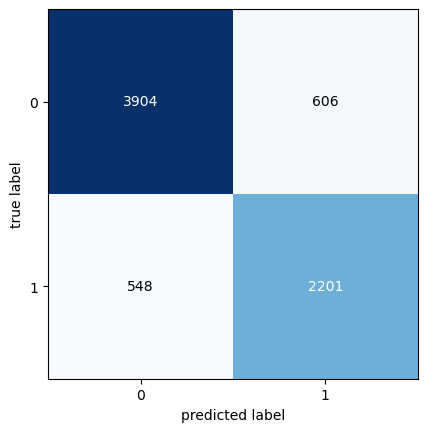

Recall (Sensitivity): 0.8006547835576573
--------------------
Specificity: 0.8656319290465632
--------------------
False Positive Rate (FPR): 0.1343680709534368
--------------------
Precision: 0.7841111506946918
--------------------
Negative Predictive Value (NPV): 0.8769092542677448
--------------------
F1 Score: 0.7922966162706983
--------------------


In [79]:
# Compute accuracy
model_accuracy = accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(f"Model Accuracy: {model_accuracy}\n{'-'*20}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
true_positive = conf_matrix[1, 1]  # TP
true_negative = conf_matrix[0, 0]  # TN
false_positive = conf_matrix[0, 1]  # FP
false_negative = conf_matrix[1, 0]  # FN

# Print classification report
print(f"Classification Report:\n{classification_report(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])}\n{'-'*20}")

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix)
plt.show()

# Compute sensitivity (recall)
recall_value = true_positive / float(true_positive + false_negative)
print(f"Recall (Sensitivity): {recall_value}\n{'-'*20}")

# Compute specificity
specificity_value = true_negative / float(true_negative + false_positive)
print(f"Specificity: {specificity_value}\n{'-'*20}")

# Compute false positive rate (FPR)
fpr_value = false_positive / float(true_negative + false_positive)
print(f"False Positive Rate (FPR): {fpr_value}\n{'-'*20}")

# Compute precision
precision_value = true_positive / float(true_positive + false_positive)
print(f"Precision: {precision_value}\n{'-'*20}")

# Compute negative predictive value (NPV)
npv_value = true_negative / float(true_negative + false_negative)
print(f"Negative Predictive Value (NPV): {npv_value}\n{'-'*20}")

# Compute F1-score
f1_value = 2 * (precision_value * recall_value) / (precision_value + recall_value)
print(f"F1 Score: {f1_value}\n{'-'*20}")

**The model demonstrates strong overall performance with balanced metrics, achieving **84% accuracy**. It performs better on **Non-converted leads (Class 0: F1-score 87%)** compared to **Class 1 (F1-score 79%)**, while effectively minimizing **false positives**.**

### **Making Prediction on the test**

In [80]:
y_test.head()

Lead Number
613339    0
628347    1
610339    0
609859    1
585386    0
Name: Converted, dtype: int32

In [81]:
y_test = pd.DataFrame(y_test, columns=['Converted'])

In [82]:
# Adding constant to X_test
X_test_sm = sm.add_constant(X_test[X_train_rfe_2.columns])
# Making predictions on the test set
y_test_pred = model2.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = y_test.copy()
y_test_pred_final['Converted'] = y_test['Converted']
y_test_pred_final['Conversion_Prob'] = y_test_pred

# Creating new column 'predicted' with 1 if Conversion_Prob > 0.4 (the optimal threshold) else 0
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Checking the prediction on test set
y_test_pred_final.head()

,Converted,Conversion_Prob,Predicted
Lead Number,,,
613339,0,0.156376,0
628347,1,0.929964,1
610339,0,0.073008,0
609859,1,0.478200,1
585386,0,0.001718,0


Model Accuracy: 0.8397
--------------------
Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1129
           1       0.77      0.82      0.79       686

    accuracy                           0.84      1815
   macro avg       0.83      0.84      0.83      1815
weighted avg       0.84      0.84      0.84      1815

--------------------


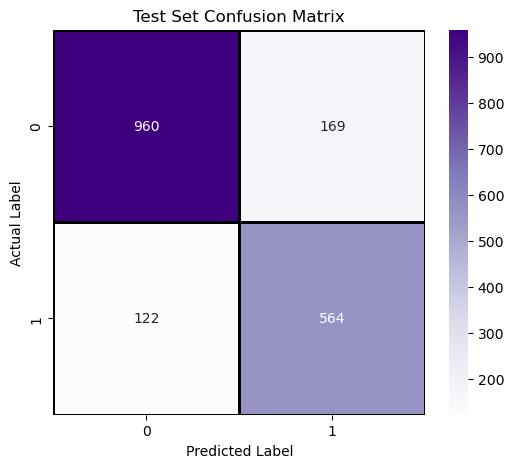

Model Sensitivity (Recall): 0.8222
--------------------
Model Specificity: 0.8503
--------------------
Model False Positive Rate (FPR): 0.1497
--------------------
Model Precision: 0.7694
--------------------
Model Negative Predictive Value (NPV): 0.8872
--------------------
Model F1-Score: 0.7949
--------------------


In [83]:
# Compute and display model accuracy
test_accuracy = accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["Predicted"])
print(f'Model Accuracy: {test_accuracy:.4f}\n{"-"*20}')

# Generate confusion matrix
conf_matrix_test = confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final["Predicted"])
true_positive = conf_matrix_test[1, 1]  # TP
true_negative = conf_matrix_test[0, 0]  # TN
false_positive = conf_matrix_test[0, 1]  # FP
false_negative = conf_matrix_test[1, 0]  # FN

# Display classification report
print(f'Model Performance Metrics:\n{classification_report(y_test_pred_final["Converted"], y_test_pred_final["Predicted"])}\n{"-"*20}')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Purples', linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Test Set Confusion Matrix")
plt.show()

# Sensitivity (Recall)
recall_test = true_positive / float(true_positive + false_negative)
print(f'Model Sensitivity (Recall): {recall_test:.4f}\n{"-"*20}')

# Specificity
specificity_test = true_negative / float(true_negative + false_positive)
print(f'Model Specificity: {specificity_test:.4f}\n{"-"*20}')

# False Positive Rate
fpr_test = false_positive / float(true_negative + false_positive)
print(f'Model False Positive Rate (FPR): {fpr_test:.4f}\n{"-"*20}')

# Precision (Positive Predictive Value)
precision_test = true_positive / float(true_positive + false_positive)
print(f'Model Precision: {precision_test:.4f}\n{"-"*20}')

# Negative Predictive Value
npv_test = true_negative / float(true_negative + false_negative)
print(f'Model Negative Predictive Value (NPV): {npv_test:.4f}\n{"-"*20}')

# F1-Score Calculation
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print(f'Model F1-Score: {f1_test:.4f}\n{"-"*20}')

**The model maintains consistent performance on the test set, achieving an **accuracy of 83.9%**.**

# **Step 6:** Conclusion

In [84]:
# Create the metrics DataFrame to compare train and test set performance
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [model_accuracy, test_accuracy],
    'Sensitivity': [recall_value, recall_test],
    'Specificity': [specificity_value, specificity_test],
    'Precision': [precision_value, precision_test],
    'False Positive Rate': [fpr_value, fpr_test],
    'Negative Predictive Rate': [npv_value, npv_test],
    'F1-score': [f1_value, f1_test],
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Dataset', inplace=True)
metrics_df = metrics_df.round(3)
print('Model Performance on Train data vs. Test data performance', '\n','-'*115,'\n', metrics_df)

Model Performance on Train data vs. Test data performance 
 ------------------------------------------------------------------------------------------------------------------- 
          Accuracy  Sensitivity  Specificity  Precision  False Positive Rate  \
Dataset                                                                       
Train       0.841        0.801        0.866      0.784                0.134   
Test        0.840        0.822        0.850      0.769                0.150   

         Negative Predictive Rate  F1-score  
Dataset                                      
Train                       0.877     0.792  
Test                        0.887     0.795  


- The model exhibits **excellent predictive power**, achieving **84.1% accuracy** and an **AUC score of 0.91**, effectively distinguishing between converting and non-converting leads.  
- It demonstrates **remarkable stability**, with nearly identical performance on the **training set (84.1%)** and **test set (83.9%)**, confirming its reliability in real-world applications.  
- An **optimal prediction threshold of 0.4** ensures a balanced approach, making it practical for business decisions.  
- The model effectively **handles class imbalance** while maintaining consistent performance, making it a **dependable tool for diverse lead scenarios**.  
- With **strong generalization capabilities** and no signs of overfitting, it delivers **reliable predictions on new data**.

## Create the Lead Score Final Dataframe

In [85]:
# Create a full dataset with predicted Lead Score from 0 to 100
y_final = pd.concat([y_train_pred_final[['Conversion_Prob']], y_test_pred_final[['Conversion_Prob']]], axis=0)
y_final['Lead Score'] = round(y_final['Conversion_Prob'] * 100,0).astype(int)
y_final.head()

,Conversion_Prob,Lead Score
Lead Number,,
589885,0.322255,32
596270,0.553402,55
649597,0.156376,16
604385,0.094496,9
629524,0.930509,93


### Feature Importance of the model

In [86]:
# Create the dataframe for feature coef
params = pd.DataFrame({
    'Coefficient': model2.params.values,
    'P-value': model2.pvalues
})
params['Importance'] = 100.0 * (abs(params['Coefficient']) / abs(params['Coefficient']).max())
params = params.round({
    'Coefficient': 2,
    'P-value': 4,  # P-values often need more decimal places
    'Importance': 2
})
params = params.sort_values('Coefficient', ascending=False)
params.head(20)

,Coefficient,P-value,Importance
Lead Source_Partner Sites,3.86,0.0002,100.00
Total Time Spent on Website,3.59,0.0000,93.16
Lead Origin_Lead Add Form,2.38,0.0000,61.72
What is your current occupation_Working,1.43,0.0000,37.10
Tags_Lost_Closed,0.86,0.0000,22.25
const,0.21,0.0060,5.56
What is your current occupation_Unknown,-0.86,0.0000,22.20
Do Not Email,-1.06,0.0000,27.46
Lead Quality_Unknown,-1.90,0.0000,49.27
Lead Quality_Not Sure,-2.46,0.0000,63.75


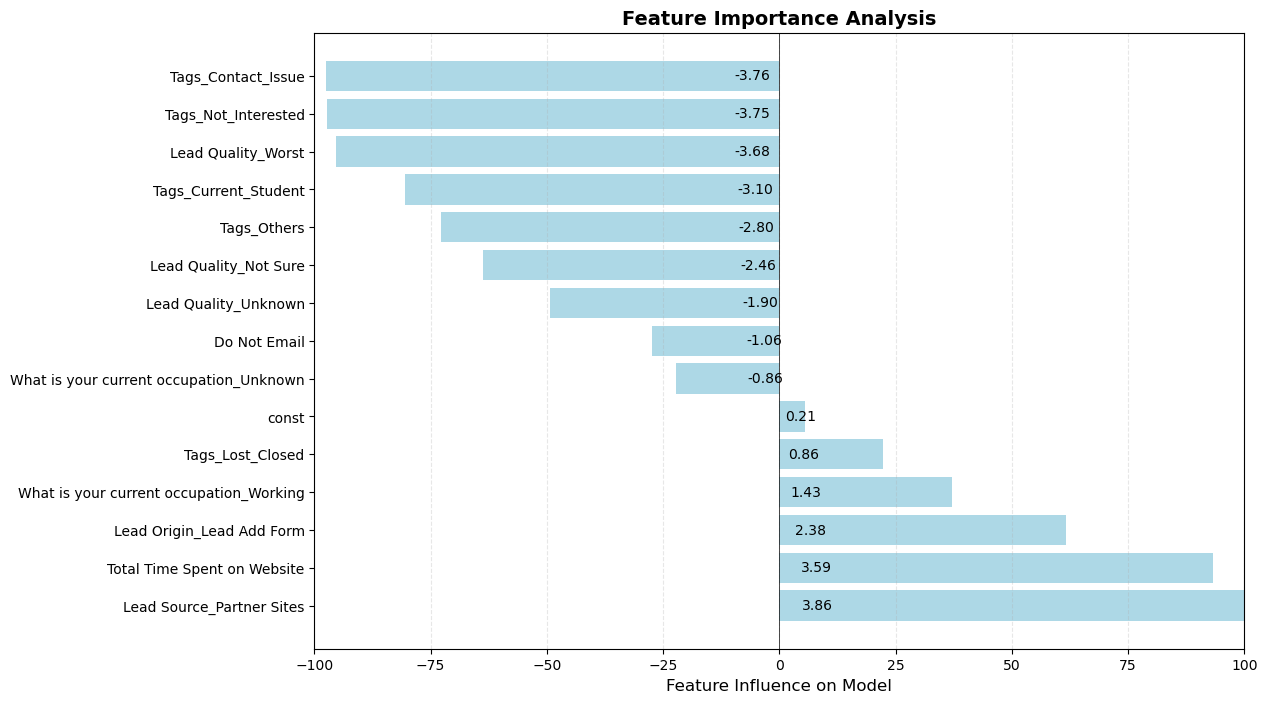

In [87]:
# Separate positive and negative coefficients
pos_features = params[params["Coefficient"] > 0].sort_values(by="Importance", ascending=False)
neg_features = params[params["Coefficient"] < 0].sort_values(by="Importance", ascending=True)
ordered_features = pd.concat([pos_features, neg_features])

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(y=range(len(ordered_features)), 
         width=ordered_features["Importance"] * np.sign(ordered_features["Coefficient"]), 
         color='lightblue')

plt.xlabel("Feature Influence on Model", fontsize=12)
plt.yticks(ticks=range(len(ordered_features)), labels=ordered_features.index, fontsize=10)

# Draw vertical reference line
plt.axvline(x=0, color="black", linestyle="-", linewidth=0.5)

# Display coefficient values on bars
for idx, coef_value in enumerate(ordered_features["Coefficient"]):
    alignment_offset = 1 if coef_value > 0 else -6
    plt.text(coef_value + alignment_offset, idx, f"{coef_value:.2f}", va="center")

# Add light gridlines along x-axis
plt.grid(axis="x", linestyle="--", alpha=0.3)

# Ensure a symmetrical x-axis range
plt.xlim(-100, 100)

plt.title("Feature Importance Analysis", fontsize=14, fontweight='bold')
plt.show()

#### **Key Positive Predictors (Increase Conversion Probability):**  
- **Lead Source_Partner Sites (3.86):** The most influential positive factor. As observed in the analysis, partnerships enhance trust and credibility, encouraging users to enroll.  
- **Total Time Spent on Website (3.59):** A significant predictor with strong correlation to conversion, aligning with EDA insights that suggest longer website engagement increases the likelihood of enrollment.  
- **Lead Origin_Lead Add Form (2.38):** A strong indicator of user interest, as filling out the form directly reflects engagement with the course offerings.  

#### **Key Negative Predictors (Decrease Conversion Probability):**  
- **Tags_Contact_Issue (-3.76):** A major negative factor, as unsuccessful contact attempts suggest that users are uninterested in further communication.  
- **Tags_Not_Interested (-3.75):** A strong deterrent to conversion, as users explicitly express disinterest in the courses.  
- **Lead Quality_Worst (-3.68):** Significantly reduces the probability of conversion, indicating that lower lead quality is closely tied to poor conversion potential.